In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("../input/titanic/titanic-passengers.csv", sep=';')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [6]:
data.Age.fillna(data.Age.mean(), inplace = True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


Transform the variable sex to  numerical data

In [8]:
data.Sex = data.Sex.map(lambda x: 1 if x == 'male' else 0)

In [9]:
data.Survived = data.Survived.map(lambda x:1 if x == 'Yes' else 0)

In [10]:
def plot_roc_curve(y_test, y_pred):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [11]:
def log_reg(x, y):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%
    logreg = LogisticRegression()   #build our logistic model
    logreg.fit(x_train, y_train)  #fitting training data
    y_pred  = logreg.predict(x_test)    #testing model’s performance
    print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))
    print(metrics.confusion_matrix(y_test, y_pred))
    
    confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True)

    print("AUC score=",metrics.roc_auc_score(y_test, y_pred))
    
    return y_test, y_pred

Accuracy=0.83
[[129  15]
 [ 24  55]]
AUC score= 0.7960179324894515


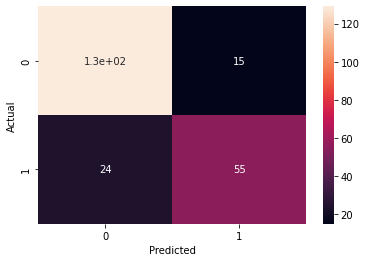

In [12]:
y_test, y_pred = log_reg(data[['Sex','Age']], data['Survived'])


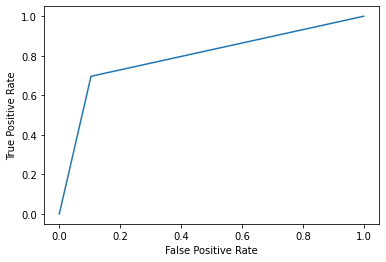

In [13]:
plot_roc_curve(y_test, y_pred)

Accuracy=0.65
[[144   0]
 [ 79   0]]
AUC score= 0.5


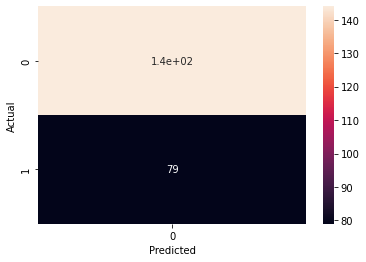

In [14]:
y_test, y_pred = log_reg(data[['Age']], data['Survived'])

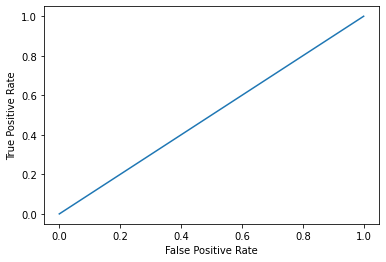

In [15]:
plot_roc_curve(y_test, y_pred)

Accuracy=0.64
[[142   2]
 [ 78   1]]
AUC score= 0.49938466947960625


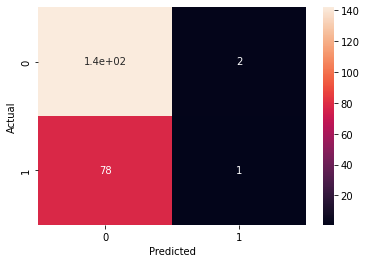

In [16]:
y_test, y_pred = log_reg(data[['Parch']], data['Survived'])

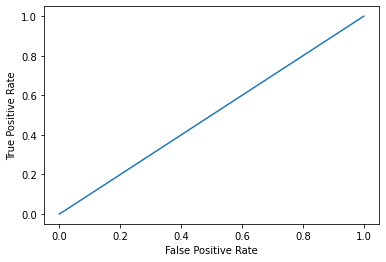

In [17]:
plot_roc_curve(y_test, y_pred)